## 7.1Maximum Margin Classifiers

从线性模型二分类问题出发:
$$y(x)=w^T(x)\phi(x)+b$$

$$\begin{cases}
t_n=+1,y(x_n)>0\\
t_n=-1,y(x_n)<0
\end{cases}$$
边缘(margin):决策边界与最近的数据点之间的垂直距离

在分类的线性模型中，点x到$y(x)=0$定义的超平面的垂直距离是:$\frac{|y(x)|}{\lVert x\lVert}$,对于能够正确分类的数据点有$t_ny(x_n)>0$,点$x_n$到决策面的距离为$\frac{t_n(w^T\phi(x_n)+b)}{\lVert x\lVert}$

最大边缘:$$\mathop{argmax}_{w,b}\bigg \{\frac{1}{\lVert w\lVert}\mathop{min}_{n}[t_n(w^T\phi(x_n)+b)]\bigg\}$$

对于距离决策面最近的点$$t_n(w^T\phi(x_n)+b)=1$$

则所有数据点满足
$$t_n(w^T\phi(x_n)+b)\ge1$$
则最优化问题简化为:
$$\mathop{argmin}_{w,b}\frac{1}{2}\lVert{w}\lVert^2$$

引入Lagrange乘子$a_n\ge0$:
$$L(w,b,a)=\frac{1}{2}\lVert{w}\lVert^2-\sum^N_{n=1}a_n\{t_n(w^T\phi(x_n)+b)-1\}$$

$$w=\sum_{n=1}^Na_nt_n\phi(x_n)$$
$$0=\sum^N_{n=1}a_nt_n$$
最大边缘化问题的对偶表示:
$$\tilde{L}(a)=\sum_{n=1}^Na_n-\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^Na_na_mt_nt_mk(x_n,x_m)$$
限制条件为:$$a_n\ge0,n=1,...,N$$
$$\sum^N_{n=1}a_nt_n=0$$

消去w,y(x)可由参数${a_N}$和核函数表示:
$$y(x)=\sum_{n=1}^Na_nt_nk(x,x_n)+b$$
该最优化问题满足KKT条件:
$$\begin{cases}a_n\ge0\\t_ny(x_n)-1\ge0\\a_n{t_ny(x_n)-1}=0\end{cases}$$
对于每个数据点，要么$a_n=0$要么$t_ny(x_n)=1$,使得$a_n=0$的数据点对于$y(x)$没有贡献，对预测无用，$a_n\ne0$的点被称为支持向量。⼀旦模型被训练完毕，相当多的数据点都可以被丢弃，只有⽀持向量被保留。


因为:
$$t_n\bigg(\mathop\sum_{m\in S}a_mt_mk(x_n,x_m)+b\bigg)=1$$

$$b=\frac{1}{N_S}\mathop\sum_{n\in S}\bigg(t_n-\mathop\sum_{m\in S}a_mt_mk(x_n,x_m)\bigg)$$
其中$N_S$为支持向量总数


In [4]:
np.tile(x_train,(3,1,1))

array([[[ 0.,  2.],
        [ 2.,  0.],
        [-1., -1.]],

       [[ 0.,  2.],
        [ 2.,  0.],
        [-1., -1.]],

       [[ 0.,  2.],
        [ 2.,  0.],
        [-1., -1.]]])

In [5]:
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.kernel import (
    RBF,
    PolynomialKernel,
    #SupportVectorClassifier,
    RelevanceVectorRegressor,
    RelevanceVectorClassifier
)

np.random.seed(1234)

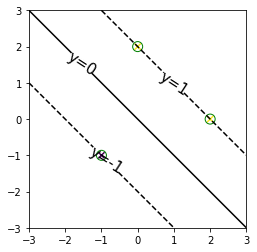

In [2]:
#线性核
x_train = np.array([
        [0., 2.],
        [2., 0.],
        [-1., -1.]])
y_train = np.array([1., 1., -1.])

model = SupportVectorClassifier(PolynomialKernel(degree=1))
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")

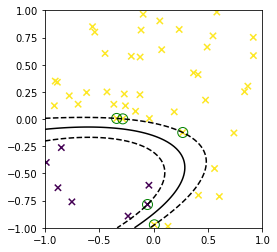

In [3]:
def create_toy_data():
    x = np.random.uniform(-1, 1, 100).reshape(-1, 2)
    y = x < 0
    y = (y[:, 0] * y[:, 1]).astype(np.float)
    return x, 1 - 2 * y
#高斯核
x_train, y_train = create_toy_data()

model = SupportVectorClassifier(RBF(np.ones(3)))
model.fit(x_train, y_train)

x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(
    x0, x1, model.distance(x).reshape(100, 100),
    np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")